# DATA SCIENCE TECHNOLOGY AND SYSTEM
# Assignment – 1
### Predictive Modelling of Eating-Out problem
Student name: Kay Huynh
Student ID: u3245926

### Part B – Predictive Modelling

#### I. Feature Engineering:

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

##### 1. Perform data cleaning to remove/impute any records that are useless in the predictive task (such as NA, NaN, etc.)

In [2]:
# Read data
data= pd.read_csv('data\zomato_df_final_data.csv')
data.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [3]:
#Deleting Unnnecessary Columns
data=data.drop(['link','color','phone','cuisine_color','address','lat','lng'],axis=1) 

In [4]:
# Cuisine column processing 
data['cuisine'] = data['cuisine'].str.split(', ')
restaurant_df = data.explode("cuisine").reset_index(drop=True)
restaurant_df['cuisine'] = restaurant_df['cuisine'].astype(str)
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace('[', '')
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace("'", '')
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace("]", '')

In [5]:
# type column processing 
restaurant_df['type'] = restaurant_df ['type'].str.split(', ')
restaurant_df = restaurant_df.explode("type").reset_index(drop=True)
restaurant_df['type'] = restaurant_df['type'].astype(str)
restaurant_df['type'] = restaurant_df['type'].str.replace('[', '')
restaurant_df['type'] = restaurant_df['type'].str.replace("'", '')
restaurant_df['type'] = restaurant_df['type'].str.replace("]", '')

##### Exploratory data analysis

In [6]:
# data shape
print(restaurant_df.shape)
# column names
print(restaurant_df.columns)

(18644, 10)
Index(['cost', 'cuisine', 'rating_number', 'rating_text', 'subzone', 'title',
       'type', 'votes', 'groupon', 'cost_2'],
      dtype='object')


In [7]:
# summary of dataset
print(restaurant_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18644 entries, 0 to 18643
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           18060 non-null  float64
 1   cuisine        18644 non-null  object 
 2   rating_number  13240 non-null  float64
 3   rating_text    13240 non-null  object 
 4   subzone        18644 non-null  object 
 5   title          18644 non-null  object 
 6   type           18644 non-null  object 
 7   votes          13240 non-null  float64
 8   groupon        18644 non-null  bool   
 9   cost_2         18060 non-null  float64
dtypes: bool(1), float64(4), object(5)
memory usage: 1.3+ MB
None


In [8]:
# summary of missing value in dataset
count_missing_df = restaurant_df.isna().sum()
count_missing_df

cost              584
cuisine             0
rating_number    5404
rating_text      5404
subzone             0
title               0
type                0
votes            5404
groupon             0
cost_2            584
dtype: int64

In [9]:
# check if the target variable has any na/null values
restaurant_df = restaurant_df[restaurant_df['rating_number'].notna()]
print(restaurant_df.shape)

(13240, 10)


In [10]:
# Explore categorical variables
# types of variables
# categrical variables
categorical = [var for var in restaurant_df.columns if restaurant_df[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)
restaurant_df[categorical].head()

There are 5 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'title', 'type']


,cuisine,rating_text,subzone,title,type
0,Hot Pot,Very Good,CBD,Sydney Madang,Casual Dining
1,Korean BBQ,Very Good,CBD,Sydney Madang,Casual Dining
2,BBQ,Very Good,CBD,Sydney Madang,Casual Dining
3,Korean,Very Good,CBD,Sydney Madang,Casual Dining
4,Cafe,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,Café


In [11]:
# get the frequency counts of the categorical variables
for var in categorical:
    print(restaurant_df[var].value_counts())

cuisine
Cafe                 2306
Modern Australian    1009
Italian               767
Pizza                 607
Chinese               596
                     ... 
Pastry                  1
Kiwi                    1
Russian                 1
Ethiopian               1
Czech                   1
Name: count, Length: 128, dtype: int64
rating_text
Average      7889
Good         3767
Very Good    1062
Poor          395
Excellent     127
Name: count, dtype: int64
subzone
CBD                                       717
Surry Hills                               444
Newtown                                   302
Darlinghurst                              287
Parramatta                                281
                                         ... 
Circular Quay Wharf, CBD                    1
Macquarie Fields                            1
Dee Why Grand Shopping Centre, Dee Why      1
The Light Brigade Hotel, Woollahra          1
Jenolan                                     1
Name: count, Length: 520,

In [12]:
# get the percentages in each of the categorical variables
for var in categorical:
    print(restaurant_df[var].value_counts() / restaurant_df.shape[0])

cuisine
Cafe                 0.174169
Modern Australian    0.076208
Italian              0.057931
Pizza                0.045846
Chinese              0.045015
                       ...   
Pastry               0.000076
Kiwi                 0.000076
Russian              0.000076
Ethiopian            0.000076
Czech                0.000076
Name: count, Length: 128, dtype: float64
rating_text
Average      0.595846
Good         0.284517
Very Good    0.080211
Poor         0.029834
Excellent    0.009592
Name: count, dtype: float64
subzone
CBD                                       0.054154
Surry Hills                               0.033535
Newtown                                   0.022810
Darlinghurst                              0.021677
Parramatta                                0.021224
                                            ...   
Circular Quay Wharf, CBD                  0.000076
Macquarie Fields                          0.000076
Dee Why Grand Shopping Centre, Dee Why    0.000076
The 

In [13]:
# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [14]:
explore_categorical(restaurant_df, 'cuisine')

********** missing values **********
0
********** Labels **********
['Hot Pot' 'Korean BBQ' 'BBQ' 'Korean' 'Cafe' 'Coffee and Tea' 'Salad'
 'Poké' 'Japanese' 'Modern Australian' 'Thai' 'Desserts' 'Cantonese'
 'Chinese' 'Yum Cha' 'Sushi' 'Ramen' 'Malaysian' 'Taiwanese' 'Seafood'
 'Asian' 'Italian' 'Steak' 'French' 'Singaporean' 'European' 'Mexican'
 'Bar Food' 'American' 'Burger' 'Lebanese' 'Bakery' 'Grill' 'Pizza'
 'Vietnamese' 'Cuban' 'Latin American' 'Irish' 'Healthy Food' 'Australian'
 'Fusion' 'Patisserie' 'Juices' 'Vegetarian' 'Japanese BBQ' 'Spanish'
 'Dumplings' 'Indonesian' 'Indian' 'Tapas' 'Turkish' 'Vegan' 'Shanghai'
 'Tea' 'Caribbean' 'Sandwich' 'Fast Food' 'Middle Eastern' 'German'
 'Mediterranean' 'Pho' 'Greek' 'Beverages' 'Kebab' 'Fish and Chips'
 'Moroccan' 'Pakistani' 'Sri Lankan' 'Pub Food' 'Contemporary' 'Teriyaki'
 'Meat Pie' 'British' 'Brasserie' 'Belgian' 'Austrian' 'Hungarian' 'Swiss'
 'Charcoal Chicken' 'Brazilian' 'African' 'Israeli' 'Sichuan'
 'Street Food' 'Po

In [15]:
explore_categorical(restaurant_df, 'rating_text')

********** missing values **********
0
********** Labels **********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor']
********** frequency **********
rating_text
Average      7889
Good         3767
Very Good    1062
Poor          395
Excellent     127
Name: count, dtype: int64


In [16]:
explore_categorical(restaurant_df, 'subzone')

********** missing values **********
0
********** Labels **********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'E

In [17]:
explore_categorical(restaurant_df, 'type')

********** missing values **********
0
********** Labels **********
['Casual Dining' 'Café' 'Fine Dining' 'Bar' 'Dessert Parlour' 'Wine Bar'
 'Fast Food' 'Bakery' 'Food Court' 'Pub' 'Food Truck' 'nan' 'Club'
 'Beverage Shop']
********** frequency **********
type
Casual Dining      6963
Café               3400
Bar                 866
Fast Food           488
Pub                 418
Food Court          390
Bakery              217
Fine Dining         161
Wine Bar            155
Dessert Parlour     114
nan                  35
Beverage Shop        12
Food Truck           11
Club                 10
Name: count, dtype: int64


In [18]:
explore_categorical(restaurant_df, 'title')

********** missing values **********
0
********** Labels **********
['Sydney Madang' 'The Grounds of Alexandria Cafe' 'Sokyo' ...
 'Hungry Hunter Sandwiches' 'Gardenia Motor Inn' 'Shades on Victoria']
********** frequency **********
title
Meet Mica                   16
Kin Senn                    16
Coogee Pavilion             14
Platform No. 8              12
Jasmin1                     10
                            ..
Oporto                       1
Cafe Banter                  1
Bondi Massive                1
Bonditony's Burger Joint     1
Enjoy Mie                    1
Name: count, Length: 7152, dtype: int64


##### Explore Numerical Variables

In [19]:
# Find numerical variables
numericals = [var for var in restaurant_df.columns if restaurant_df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
restaurant_df[numericals].head()

There are 5 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'groupon', 'cost_2']


,cost,rating_number,votes,groupon,cost_2
0,50.0,4.0,1311.0,False,5.243902
1,50.0,4.0,1311.0,False,5.243902
2,50.0,4.0,1311.0,False,5.243902
3,50.0,4.0,1311.0,False,5.243902
4,80.0,4.6,3236.0,False,7.560976


In [20]:
# Explore problems within numerical variables
# Check missing values in numerical variables
restaurant_df[numericals].isnull().sum()

cost             150
rating_number      0
votes              0
groupon            0
cost_2           150
dtype: int64

In [21]:
# view summary statistics in numerical variables
print(round(restaurant_df[numericals].describe()), 2)

          cost  rating_number    votes   cost_2
count  13090.0        13240.0  13240.0  13090.0
mean      57.0            3.0     97.0      6.0
std       30.0            0.0    197.0      2.0
min       10.0            2.0      4.0      2.0
25%       40.0            3.0     13.0      4.0
50%       50.0            3.0     39.0      5.0
75%       70.0            4.0    104.0      7.0
max      500.0            5.0   3236.0     40.0 2


Text(0, 0.5, 'Votes')

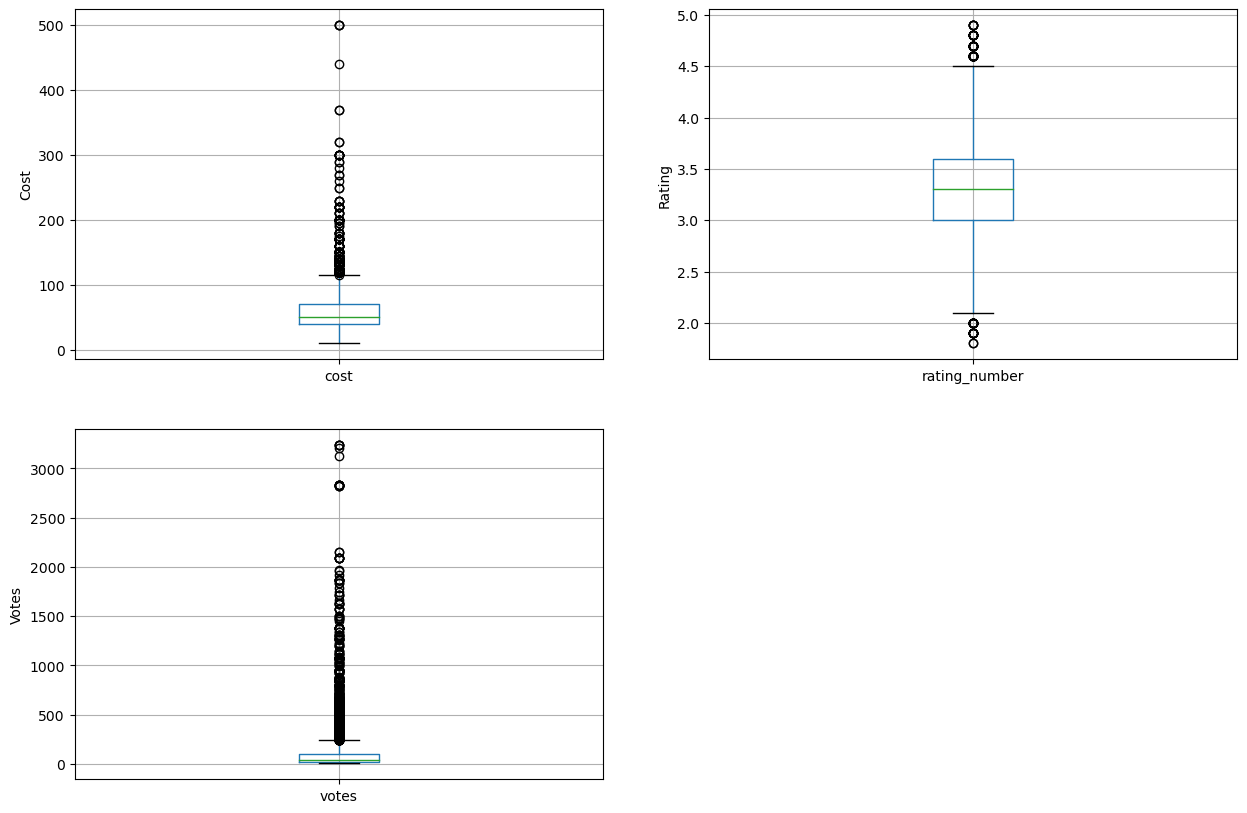

In [22]:
# Let's draw boxplots to visualise outliers in these variables
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
fig = restaurant_df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('Cost')

plt.subplot(2,2,2)
fig = restaurant_df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('Rating')

plt.subplot(2,2,3)
fig = restaurant_df.boxplot(column= 'votes')
fig.set_title('')
fig.set_ylabel('Votes')


Text(0, 0.5, 'Rating')

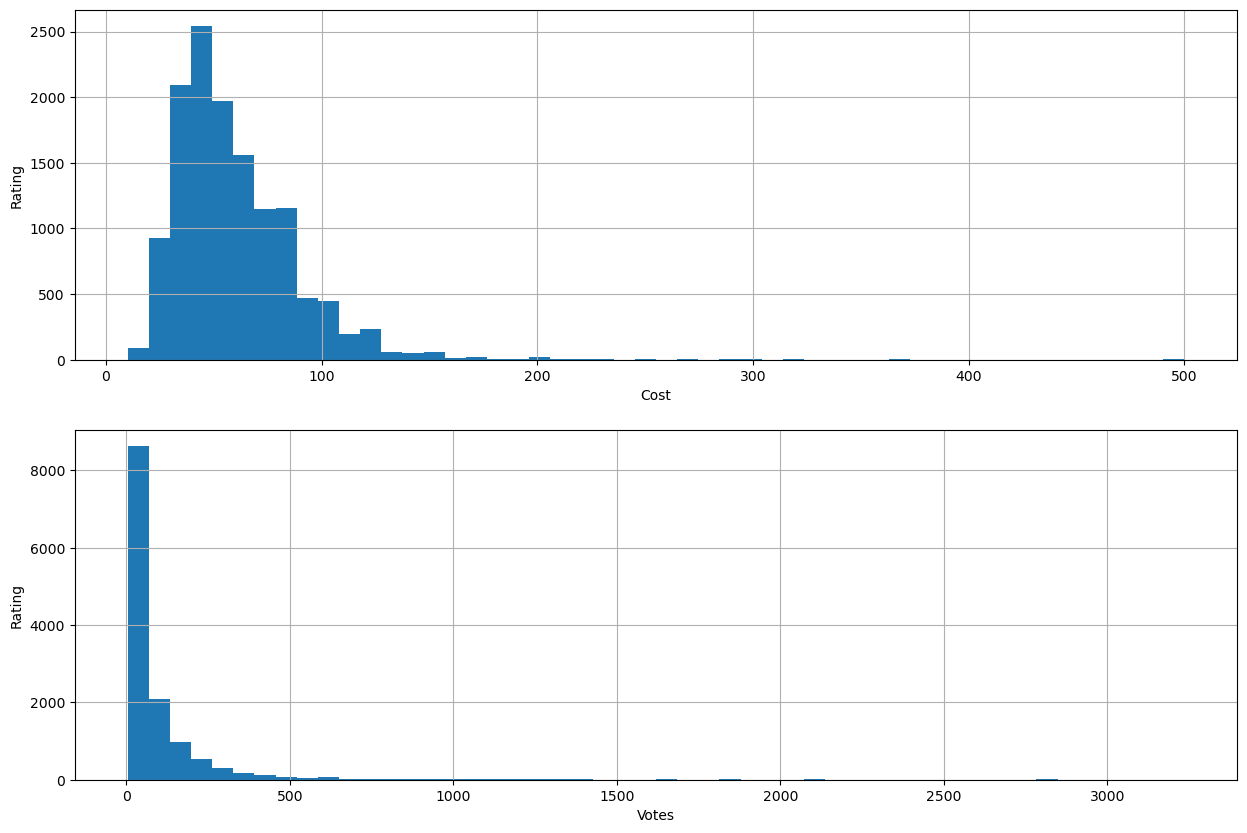

In [23]:
# plot histogram to check distribution
y = restaurant_df['rating_number']
plt.figure(figsize=(15,10))


plt.subplot(2, 1, 1)
fig = restaurant_df['cost'].hist(bins=50)
fig.set_xlabel('Cost')
fig.set_ylabel('Rating')


plt.subplot(2, 1, 2)
fig = restaurant_df["votes"].hist(bins=50)
fig.set_xlabel('Votes')
fig.set_ylabel('Rating')


In [24]:
# Find aoutliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = restaurant_df[variable].quantile(0.75) - restaurant_df[variable].quantile(0.25)
    Lower_boundary = restaurant_df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = restaurant_df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(restaurant_df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [25]:

_,_,_ = find_outliers('cost')

cost outliers are values < -50.0 or > 160.0


In [26]:

_,_,_ = find_outliers('rating_number')

rating_number outliers are values < 1.1999999999999997 or > 5.4


In [27]:

_,_,_ = find_outliers('votes')

votes outliers are values < -260.0 or > 377.0


#### Feature engineering

In [28]:
restaurant_df.dtypes

cost             float64
cuisine           object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
cost_2           float64
dtype: object

In [29]:
# display categorical variables
categorical = [var for var in restaurant_df.columns if restaurant_df[var].dtypes == 'O']
categorical

['cuisine', 'rating_text', 'subzone', 'title', 'type']

In [30]:
# display numerical variables
numericals = [var for var in restaurant_df.columns if restaurant_df[var].dtypes != 'O']
numericals

['cost', 'rating_number', 'votes', 'groupon', 'cost_2']

#### Engineering missing values in numerical variables

In [31]:
# display missing values
restaurant_df[numericals].isnull().sum()

cost             150
rating_number      0
votes              0
groupon            0
cost_2           150
dtype: int64

In [32]:
# percentage of missing values in each variable
round(restaurant_df[numericals].isnull().mean(), 2)

cost             0.01
rating_number    0.00
votes            0.00
groupon          0.00
cost_2           0.01
dtype: float64

In [33]:
# Impute the missing values with the median values -- median is robust with the outliers
for df_temp in [restaurant_df]:
    for col in numericals:
        col_median = restaurant_df[col].median() # get it only from training
        df_temp[col].fillna(col_median, inplace=True)

In [34]:
# check again missing values in numerical variables in X_train
restaurant_df[numericals].isnull().sum()

cost             0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64

#### Engineering missing values in categorical variables

In [35]:
round(restaurant_df[categorical].isnull().mean(), 2)

cuisine        0.0
rating_text    0.0
subzone        0.0
title          0.0
type           0.0
dtype: float64

In [36]:
# impute missing categorical variables with most frequent value (i.e., mode)
for df_temp in [restaurant_df]:
    for col in categorical:
        col_mode = restaurant_df[col].mode()[0] # get it only from training
        df_temp[col].fillna(col_mode, inplace=True)

In [37]:
# check missing values in categorical variables in data
restaurant_df[categorical].isnull().sum()

cuisine        0
rating_text    0
subzone        0
title          0
type           0
dtype: int64

#### Engineering outliers in numerical variables

In [38]:
# Replace the outliers with some predefined the maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 160, 
                      'votes': 377
                     }
for df_temp in [restaurant_df]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])

In [39]:
restaurant_df.cost.max()

160.0

In [40]:
restaurant_df.votes.max()

377.0

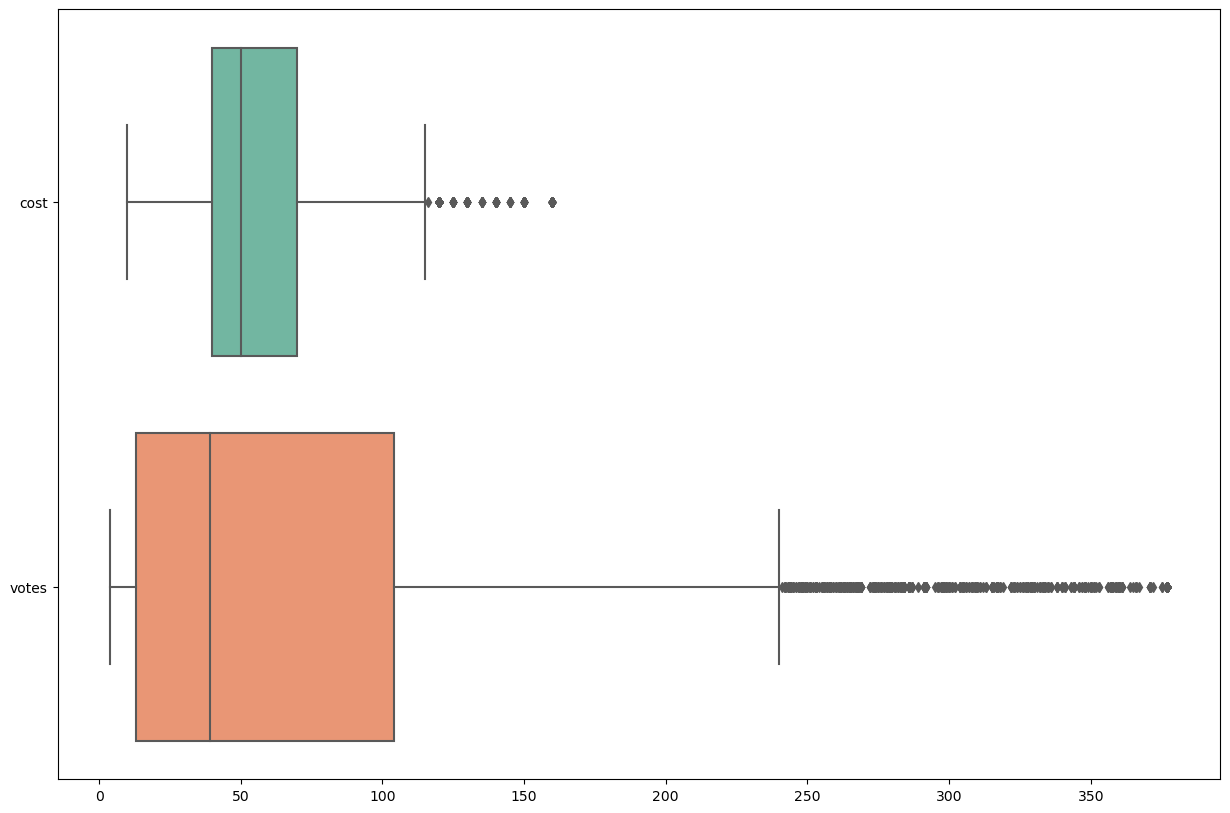

In [41]:
# we can also use seaborn library to plot elegant ones
df_custom = restaurant_df[['cost', 'votes']]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")


##### 2. Use proper label/feature encoding for each feature/column you consider making the data ready for the modelling step

#### Encoding the categorical variables

In [42]:
restaurant_df[categorical].head()

,cuisine,rating_text,subzone,title,type
0,Hot Pot,Very Good,CBD,Sydney Madang,Casual Dining
1,Korean BBQ,Very Good,CBD,Sydney Madang,Casual Dining
2,BBQ,Very Good,CBD,Sydney Madang,Casual Dining
3,Korean,Very Good,CBD,Sydney Madang,Casual Dining
4,Cafe,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,Café


In [43]:
#Encode the input Variables
def Encode(restaurant_df):
    for column in restaurant_df.columns[~restaurant_df.columns.isin(['cost', 'votes'])]:
        restaurant_df[column] = restaurant_df[column].factorize()[0]
    return restaurant_df

df_en = Encode(restaurant_df.copy())

In [44]:
df_en

,cost,cuisine,rating_number,rating_text,subzone,title,type,votes,groupon,cost_2
0,50.0,0,0,0,0,0,0,377.0,0,0
1,50.0,1,0,0,0,0,0,377.0,0,0
2,50.0,2,0,0,0,0,0,377.0,0,0
3,50.0,3,0,0,0,0,0,377.0,0,0
4,80.0,4,1,1,1,1,1,377.0,0,1
...,...,...,...,...,...,...,...,...,...,...
17176,65.0,9,31,3,53,7150,0,4.0,0,23
18217,60.0,33,31,3,515,7151,0,4.0,0,10
18218,60.0,33,31,3,515,7151,3,4.0,0,10
18219,60.0,27,31,3,515,7151,0,4.0,0,10


Index(['cost', 'cuisine', 'rating_number', 'rating_text', 'subzone', 'title',
       'type', 'votes', 'groupon', 'cost_2'],
      dtype='object')

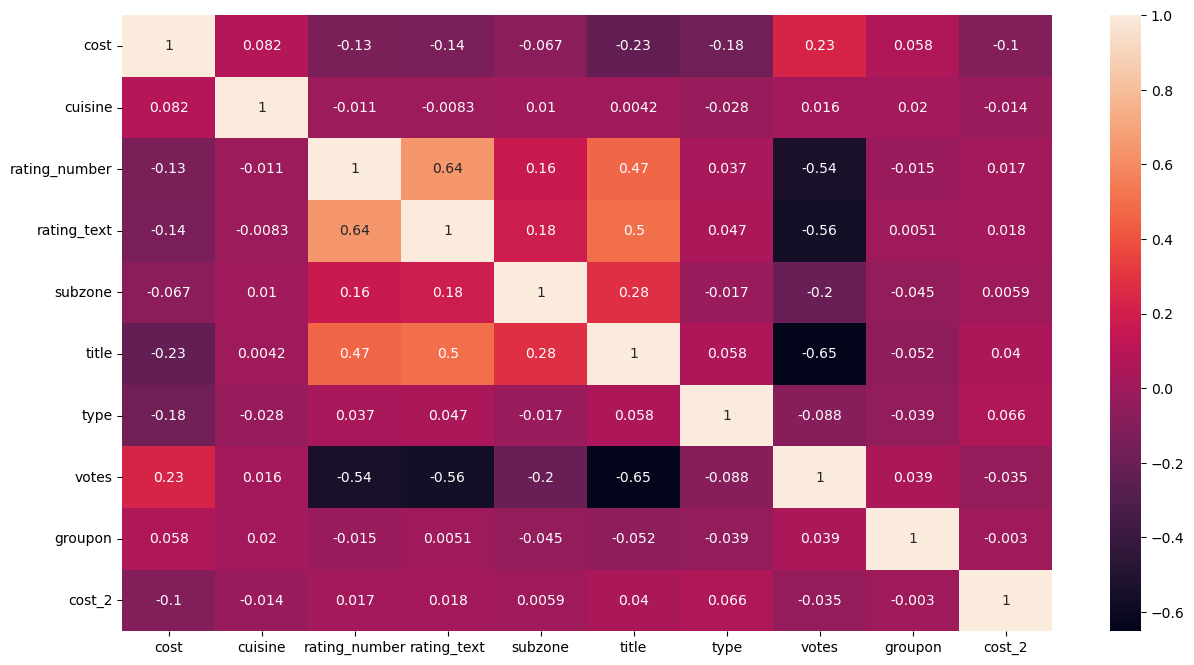

In [45]:
#Get Correlation between different variables
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

#### II. Regression:

##### 3. Build a linear regression model (model_regression_1) to predict the restaurants rating (numeric rating) from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) sets.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “
while splitting]

##### Declare source and target variables

In [46]:
X = df_en.drop(['rating_number'], axis=1)
y = df_en['rating_number']

In [47]:
X

,cost,cuisine,rating_text,subzone,title,type,votes,groupon,cost_2
0,50.0,0,0,0,0,0,377.0,0,0
1,50.0,1,0,0,0,0,377.0,0,0
2,50.0,2,0,0,0,0,377.0,0,0
3,50.0,3,0,0,0,0,377.0,0,0
4,80.0,4,1,1,1,1,377.0,0,1
...,...,...,...,...,...,...,...,...,...
17176,65.0,9,3,53,7150,0,4.0,0,23
18217,60.0,33,3,515,7151,0,4.0,0,10
18218,60.0,33,3,515,7151,3,4.0,0,10
18219,60.0,27,3,515,7151,0,4.0,0,10


In [48]:
y

0         0
1         0
2         0
3         0
4         1
         ..
17176    31
18217    31
18218    31
18219    31
18220    31
Name: rating_number, Length: 13240, dtype: int64

#### Split data into separate training and test set

In [96]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10592, 10) (10592,)
(2648, 10) (2648,)


##### Model training using logistic regression

In [97]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
model_LR = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [98]:
# Predict results
y_pred_LR = model_LR.predict(X_test)

y_pred_LR

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [99]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_LR)))

Model accuracy score: 0.9996


In [100]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(y_test, y_pred_LR)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00      1682

    accuracy                           1.00      2648
   macro avg       1.00      1.00      1.00      2648
weighted avg       1.00      1.00      1.00      2648



##### 4. Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function

In [53]:
# Data for inear regression model  Gradient Descent as the optimisation function
# X = df_en.drop([['rating_number','cuisine','groupon', 'cost_2',"title", 'rating_text','votes','cost','subzone']].value()
X = df_en[['rating_text','votes','cost','subzone','type']].values
y = df_en['rating_number'].values

In [54]:
test_size = 0.2
X_train_GD, X_test_GD, y_train_GD, y_test_GD = train_test_split(X, y, test_size = test_size, random_state=0)

In [55]:
# Add a column of ones to the feature matrix for the bias term
X_train_GD_b = np.c_[np.ones((X_train_GD.shape[0], 1)), X_train_GD]

In [56]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        # Initialize weights
        self.weights = np.random.randn(X.shape[1])

        # Perform gradient descent
        for _ in range(self.n_iterations):
            # Compute predictions
            predictions = np.dot(X, self.weights)

            # Compute errors
            errors = predictions - y

            # Update weights using gradients
            gradient_weights = (1 / len(X)) * np.dot(X.T, errors)

            self.weights -= self.learning_rate * gradient_weights

    def predict(self, X):
        return np.dot(X, self.weights)


In [57]:
# Create a LinearRegressionGD instance
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)

# Fit the model
model.fit(X_train_GD_b, y_train_GD)


In [60]:
# Generate predictions on the test data
X_test_GD_b = np.c_[np.ones((X_test.shape[0], 1)), X_test_GD]
y_pred_GDLR = model.predict(X_test_GD_b)

In [61]:
y_pred_GDLR

array([nan, nan, nan, ..., nan, nan, nan])

In [62]:
X_train_GD_b

array([[  1.,   3.,   4.,  15., 150.,   1.],
       [  1.,   3.,  25.,  70.,  52.,   9.],
       [  1.,   3.,  25.,  50., 147.,   0.],
       ...,
       [  1.,   3.,   4.,  60., 164.,   0.],
       [  1.,   3.,   5.,  35., 183.,   0.],
       [  1.,   0., 148.,  60.,  38.,   0.]])

In [63]:
y_train_GD

array([28, 21, 21, ..., 16, 16,  0], dtype=int64)

In [64]:
X_test_GD_b

array([[  1.,   3.,  18.,  35.,  80.,   1.],
       [  1.,   3.,   8.,  60., 196.,   0.],
       [  1.,   4.,  37.,  85.,   0.,   9.],
       ...,
       [  1.,   2., 180.,  50.,  40.,   1.],
       [  1.,   3.,  16.,  40.,  78.,   1.],
       [  1.,   2.,  68.,  60., 118.,   0.]])

In [65]:
y_pred_GDLR

array([nan, nan, nan, ..., nan, nan, nan])

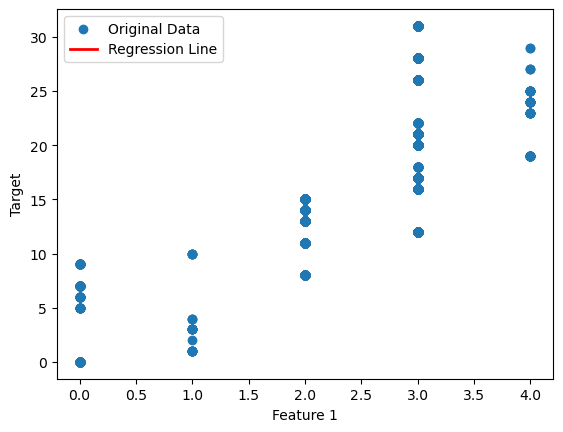

In [66]:
# Visualize the results (for a single feature)
plt.scatter(X_test_GD[:, 0], y_test_GD, label="Original Data")  # Replace 0 with the appropriate feature index
plt.plot(X_test_GD[:, 0], y_pred_GDLR, 'r-', label="Regression Line", linewidth=2)  # Replace 0 with the same feature index
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.show()

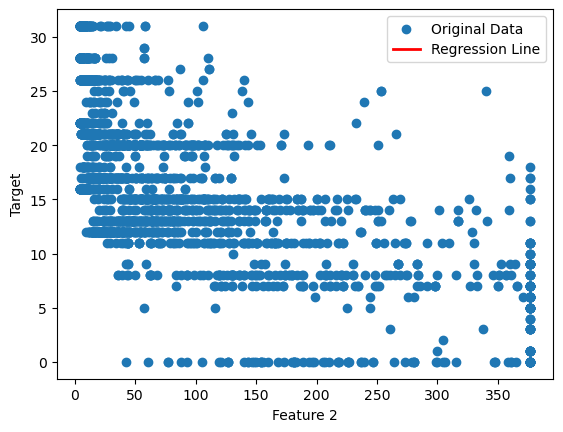

In [67]:
# Visualize the results (for a single feature)
plt.scatter(X_test_GD[:, 1], y_test_GD, label="Original Data")  # Replace 0 with the appropriate feature index
plt.plot(X_test_GD[:, 1], y_pred_GDLR, 'r-', label="Regression Line", linewidth=2)  # Replace 0 with the same feature index
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.legend()
plt.show()

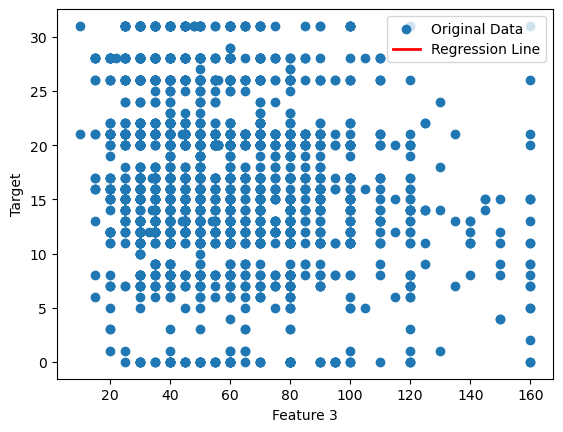

In [68]:
# Visualize the results (for a single feature)
plt.scatter(X_test_GD[:, 2], y_test_GD, label="Original Data")  # Replace 0 with the appropriate feature index
plt.plot(X_test_GD[:, 2], y_pred_GDLR, 'r-', label="Regression Line", linewidth=2)  # Replace 0 with the same feature index
plt.xlabel("Feature 3")
plt.ylabel("Target")
plt.legend()
plt.show()

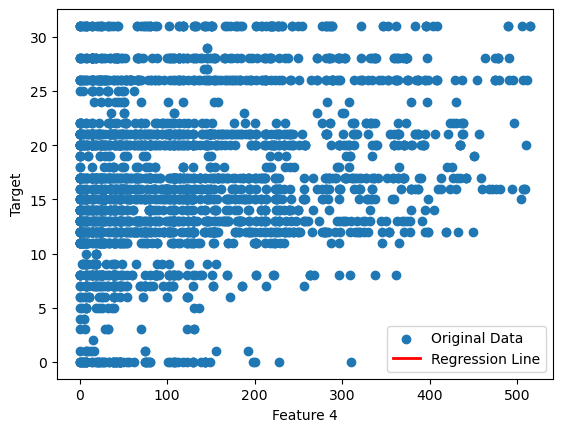

In [69]:
# Visualize the results (for a single feature)
plt.scatter(X_test_GD[:, 3], y_test_GD, label="Original Data")  # Replace 0 with the appropriate feature index
plt.plot(X_test_GD[:, 3], y_pred_GDLR, 'r-', label="Regression Line", linewidth=2)  # Replace 0 with the same feature index
plt.xlabel("Feature 4")
plt.ylabel("Target")
plt.legend()
plt.show()

##### 5. Report the mean square error (MSE) on the test data for both models.

In [70]:
from sklearn.metrics import mean_squared_error
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR


31.313066465256796

In [ ]:
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_GDLR = mean_squared_error(y_test_GD, y_pred_GDLR)
mse_GDLR

#### III. Classification:

##### 6. Simplify the problem into binary classifications where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records

In [72]:
# Define a mapping for the ratings
rating_mapping = {
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}

In [73]:
# Create a new column 'binary_rating' based on the mapping
restaurant_df['binary_rating'] = restaurant_df['rating_text'].map(rating_mapping)

In [74]:
restaurant_df

,cost,cuisine,rating_number,rating_text,subzone,title,type,votes,groupon,cost_2,binary_rating
0,50.0,Hot Pot,4.0,Very Good,CBD,Sydney Madang,Casual Dining,377.0,False,5.243902,2
1,50.0,Korean BBQ,4.0,Very Good,CBD,Sydney Madang,Casual Dining,377.0,False,5.243902,2
2,50.0,BBQ,4.0,Very Good,CBD,Sydney Madang,Casual Dining,377.0,False,5.243902,2
3,50.0,Korean,4.0,Very Good,CBD,Sydney Madang,Casual Dining,377.0,False,5.243902,2
4,80.0,Cafe,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,Café,377.0,False,7.560976,2
...,...,...,...,...,...,...,...,...,...,...,...
17176,65.0,Modern Australian,2.7,Average,Bankstown,Gardenia Motor Inn,Casual Dining,4.0,False,6.402439,1
18217,60.0,Pizza,2.7,Average,Chatswood Rsl,Shades on Victoria,Casual Dining,4.0,False,6.016260,1
18218,60.0,Pizza,2.7,Average,Chatswood Rsl,Shades on Victoria,Bar,4.0,False,6.016260,1
18219,60.0,Bar Food,2.7,Average,Chatswood Rsl,Shades on Victoria,Casual Dining,4.0,False,6.016260,1


##### 7. Build a logistic regression model (model_classification_3) for the simplified data, where training data is 80% and the test data is 20%.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “
while splitting]

In [75]:
#Encode the input Variables
def Encode(restaurant_df):
    for column in restaurant_df.columns[~restaurant_df.columns.isin(['cost', 'votes'])]:
        restaurant_df[column] = restaurant_df[column].factorize()[0]
    return restaurant_df

df_en = Encode(restaurant_df.copy())

In [76]:
X = df_en.drop(['binary_rating'], axis=1)
y = df_en['binary_rating']

In [77]:
X 

,cost,cuisine,rating_number,rating_text,subzone,title,type,votes,groupon,cost_2
0,50.0,0,0,0,0,0,0,377.0,0,0
1,50.0,1,0,0,0,0,0,377.0,0,0
2,50.0,2,0,0,0,0,0,377.0,0,0
3,50.0,3,0,0,0,0,0,377.0,0,0
4,80.0,4,1,1,1,1,1,377.0,0,1
...,...,...,...,...,...,...,...,...,...,...
17176,65.0,9,31,3,53,7150,0,4.0,0,23
18217,60.0,33,31,3,515,7151,0,4.0,0,10
18218,60.0,33,31,3,515,7151,3,4.0,0,10
18219,60.0,27,31,3,515,7151,0,4.0,0,10


In [78]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17176    1
18217    1
18218    1
18219    1
18220    1
Name: binary_rating, Length: 13240, dtype: int64

In [79]:
# split X and y into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10592, 10) (10592,)
(2648, 10) (2648,)


In [80]:
# instantiate the model
model_classification_3 = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
model_classification_3.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [81]:
# Make predictions on the test data
y_pred_3 = model_classification_3.predict(X_test)

In [82]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_3)
classification_rep = classification_report(y_test, y_pred_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9996223564954683
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00      1682

    accuracy                           1.00      2648
   macro avg       1.00      1.00      1.00      2648
weighted avg       1.00      1.00      1.00      2648



In [83]:
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_model3 = mean_squared_error(y_test, y_pred_3)
mse_model3

0.00037764350453172205

##### 8. Use the confusion matrix to report the results of using the classification model on the test data.

In [84]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_3)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 966    0]
 [   1 1681]]

True Positives(TP) =  966

True Negatives(TN) =  1681

False Positives(FP) =  0

False Negatives(FN) =  1


##### 9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions.

<Axes: >

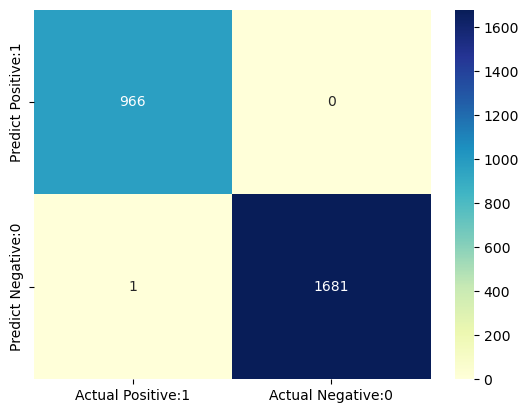

In [85]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

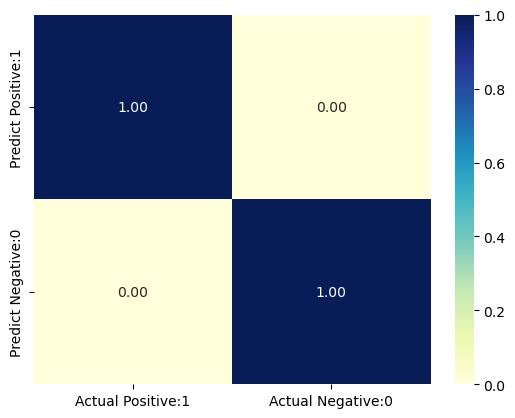

In [86]:
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

##### Bonus: Repeat the previous classification task using three other models of your choice and report the performance.

##### Decision Tree Regression

In [88]:
# Decision Tree Regression model
# Import package
from sklearn.tree import DecisionTreeRegressor

# Build model
model_DecisionTree = DecisionTreeRegressor(min_samples_leaf=.0001)

# Fit model on train data
model_DecisionTree.fit(X_train,y_train)

# Predict test data
y_pred_DT = model_DecisionTree.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_DT)))
print("Classification Report:\n", classification_report(y_test, y_pred_DT))

Model accuracy score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00      1682

    accuracy                           1.00      2648
   macro avg       1.00      1.00      1.00      2648
weighted avg       1.00      1.00      1.00      2648



In [89]:
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_model_DT = mean_squared_error(y_test, y_pred_DT)
mse_model_DT

0.0

##### Gaussian Naive Bayes (GaussianNB)

In [90]:
# Import package
from sklearn.naive_bayes import GaussianNB
# Build model
model_GNB = GaussianNB()

# Fit model on train data
model_GNB.fit(X_train, y_train)

# Predict test data
y_pred_GNB = model_GNB.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_GNB)))
print("Classification Report:\n", classification_report(y_test, y_pred_GNB))

Model accuracy score: 0.9796
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.97      0.98      1682

    accuracy                           0.98      2648
   macro avg       0.97      0.98      0.98      2648
weighted avg       0.98      0.98      0.98      2648



In [91]:
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_model_GNB = mean_squared_error(y_test, y_pred_GNB)
mse_model_GNB

0.02039274924471299

##### MLPClassifier

In [92]:
# Import package
from sklearn.neural_network import MLPClassifier

# Build model
model_MLP = MLPClassifier(random_state=1, max_iter=500)

# Fit model on train data
model_MLP.fit(X_train, y_train)

# Predict test data
y_pred_MLP = model_MLP.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_MLP)))
print("Classification Report:\n", classification_report(y_test, y_pred_MLP))

Model accuracy score: 0.9316
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       966
           1       0.91      0.99      0.95      1682

    accuracy                           0.93      2648
   macro avg       0.95      0.91      0.92      2648
weighted avg       0.94      0.93      0.93      2648



In [93]:
# Calculate the Mean Squared Error (MSE) between predicted and actual values for Regression model
mse_model_MLP = mean_squared_error(y_test,y_pred_MLP)
mse_model_MLP

0.06835347432024169

In [94]:
import joblib
# Save trained model
joblib.dump(model_LR, 'model_LR.pkl')
# joblib.dump(model_GDLR, 'model_GDLR.pkl')
joblib.dump(model_DecisionTree, 'model_DecisionTree.pkl')
joblib.dump(model_GNB, 'model_GNB.pkl')
joblib.dump(model_MLP, 'model_MLP.pkl')
joblib.dump(model_classification_3, 'model_classification_3.pkl')

['model_classification_3.pkl']